In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [4]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [5]:
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00


In [7]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=88e7c8d0549136cb3c09d0d29bc6283c09f2bf7ab45f384d84eb5a501fb51b43
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [8]:
import pandas as pd

# Load the dataset into a pandas dataframe.
data_path = data_path = '/content/drive/MyDrive/Racial Bias/fdcl18/fdcl18.csv'
df = pd.read_csv(data_path, error_bad_lines=False)

# Report the number of sentences.
print('Number of sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

<ipython-input-8-139286370a03>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(data_path, error_bad_lines=False)


Number of sentences: 99,995



,Unnamed: 0,tweet,type,votes,race
23963,23963,@TheMJTake Cyprien is not a bad pickup at all....,normal,5,3
29327,29327,Alderweireld says Spurs have not given up on w...,normal,5,3
65124,65124,"Wouldn't let Michael in because he was ""starri...",abusive,3,1
35980,35980,Can spices help adults eat more veggies? https...,normal,4,3
19896,19896,RT @AnnCoulter: Const requires 2/3ds vote to o...,abusive,2,3
85016,85016,the fact that wil is perfect is not ok. can i ...,normal,4,3
84007,84007,Vice President Pence’s “never dine alone with ...,normal,4,2
77844,77844,Hungry. But so not gonna eat. Gonna get my dre...,normal,5,1
27608,27608,@sabaowaisi @nehajoychauhan @RanaAyyub @kavita...,normal,5,0
75905,75905,RT @ayO_neesh: He gets on my fucking nerves ht...,normal,4,0


In [9]:
df

,Unnamed: 0,tweet,type,votes,race
0,0,RT @Papapishu: Man it would fucking rule if we...,abusive,4,3
1,1,It is time to draw close to Him &#128591;&#127...,normal,4,3
2,2,if you notice me start to act different or dis...,normal,5,0
3,3,"Forget unfollowers, I believe in growing. 7 ne...",normal,3,3
4,4,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive,4,0
...,...,...,...,...,...
99990,99990,RT @shangros: my fucking queen https://t.co/wa...,abusive,5,1
99991,99991,#Osteporosis treated with #PEMF - rebuild bone...,normal,3,3
99992,99992,@LGUSAMobile why does my phone screen keeps fl...,normal,3,3
99993,99993,#bigdata vs. #reality ... but equally applies ...,normal,5,3


In [12]:
for i in range(len(df)):
  if df.loc[i, 'type'] == 'hateful':
    df.loc[i, 'label'] = 0
  elif df.loc[i, 'type'] == 'abusive':
    df.loc[i, 'label'] = 1
  elif df.loc[i, 'type'] == 'spam':
    df.loc[i, 'label'] = 2
  elif df.loc[i, 'type'] == 'normal':
    df.loc[i, 'label'] = 3

In [13]:
df

,Unnamed: 0,tweet,type,votes,race,label
0,0,RT @Papapishu: Man it would fucking rule if we...,abusive,4,3,1.0
1,1,It is time to draw close to Him &#128591;&#127...,normal,4,3,3.0
2,2,if you notice me start to act different or dis...,normal,5,0,3.0
3,3,"Forget unfollowers, I believe in growing. 7 ne...",normal,3,3,3.0
4,4,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive,4,0,1.0
...,...,...,...,...,...,...
99990,99990,RT @shangros: my fucking queen https://t.co/wa...,abusive,5,1,1.0
99991,99991,#Osteporosis treated with #PEMF - rebuild bone...,normal,3,3,3.0
99992,99992,@LGUSAMobile why does my phone screen keeps fl...,normal,3,3,3.0
99993,99993,#bigdata vs. #reality ... but equally applies ...,normal,5,3,3.0


In [14]:
df.groupby('label').count()

,Unnamed: 0,tweet,type,votes,race
label,,,,,
0.0,4965,4965,4965,4965,4965
1.0,27150,27150,27150,27150,27150
2.0,14029,14029,14029,14029,14029
3.0,53851,53851,53851,53851,53851


In [15]:
# preprocessing
import numpy as np
import csv
import re,string
import nltk
import spacy
import en_core_web_sm

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from string import digits
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nlp = en_core_web_sm.load()


def load_timestopword():

    f_stop = open('/content/drive/MyDrive/Racial Bias/Time.csv',encoding='utf-8')
    tsw = [line.strip() for line in f_stop]
    f_stop.close()
    return tsw

time_stop_words = load_timestopword()

def load_Estop():

    f_stop = open('/content/drive/MyDrive/Racial Bias/Estop.csv',encoding='utf-8')
    Estop = [line.strip() for line in f_stop]
    f_stop.close()
    return Estop

Estop = load_Estop()

def convert(text): # convert sentence into a list of words & clean up
    #pattern1 = r'[^a-zA-Z\s]'  # only alphabetic words and space - no number or special characters
    #temp = re.sub(pattern1,' ', lst)
    pattern2 = r'\b\w{1,2}\b'  # remove words with less than 3 characters (e.g. am, pm, at)
    # tried with {1,3} characters, but that removes words like leg, 3 characters also removes
    # words like iv
    text = re.sub(pattern2, ' ', text)
    return text

    
    return str(text)

def removeNumbers(text):
    numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    for num in numbers:
        text = str(text).replace(str(num), " ")
    
    return str(text)
  
# This function is essentially the same as convert, just with whitespace handling
def remove_short_terms(text):
    pattern2 = r'\b\w{1,2}\b'  # remove words with less than 3 characters (e.g. am, pm, at)
    out_text = re.sub(pattern2, ' ', text)
    out_text = str(out_text.lstrip(' '))
    out_text = str(out_text.rstrip(' '))
    return str(re.sub(r'\s\s+', r' ', str(out_text)))

def remove_pun(text):
    punctuation_string = string.punctuation
    for i in punctuation_string:
        text = text.replace(i, ' ')
    return text

def remove_proper_nouns(text):
    text_words = str(text).split()
    tagged_text = pos_tag(text_words)

    proper_nouns = [word for word,pos in tagged_text if pos == 'NNP']

    if len(proper_nouns) > 0:
        words_without_proper_nouns = [word for word in text_words if not word in proper_nouns] #remove proper nouns (names)
    
        filtered_sentence = (" ").join(words_without_proper_nouns)
        return(filtered_sentence)

    else:
        return str(text)

def remove_sw_word(text):
    text_words = str(text).split()
    words_without_sw = [word for word in text_words if not word in time_stop_words]
    words_without_sw = [word for word in words_without_sw if not word in Estop]
    filtered_sentence = (" ").join(words_without_sw)
    return(filtered_sentence)

for i in range(len(df)):
    print(i)
    text = df.loc[i, 'tweet']
    text = text.lower()
    text = remove_pun(text)
    text = removeNumbers(text)
    text = remove_proper_nouns(text)
    text = remove_sw_word(text)
    text = remove_short_terms(text)
    text = convert(text)
    doc = nlp(text)
    text_ = []
    for token in doc:
        text_.append(token.lemma_)
    final_text = (' '.join(text_)).lower()
    df.loc[i, 'sentence'] = final_text
    print(final_text)

'''
df['tweet'] = df['tweet'].apply(lambda x:x.lower())
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:   
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")
'''

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Streaming output truncated to the last 5000 lines.
97495
earthanddust sure fair special kind girl somehow well remember woman … https asudibh
97496
anna soubry mail drop crime story organise crime gang send editor solicitor letter libel amp daughter
97497
come speak retire army late development syria foxrochester … https jfm bvf
97498
markccrowley agree enough story imperativ cadet apply knowledge seamle … https wml qviw
97499
subscribe ukurbansfin youtube channel good music amp entertainment https qgb ldwusp
97500
big bird property join lot free kid activity adult stop https ksvx zwdyx
97501
hire read late job opening sterile processing specialist https mir daxi … https lxujz
97502
rogerpielkejr wire funny discuss strategic planning meeting lol
97503
king bob slashess zeldawilliams valeriecomplex try act superior well self … https vadnnhto
97504
freddy purla original australian aboriginal art dot paint awsfp https phapxuf https atcfaiksra
97505
johnlegere carterjwm att tmobile wendys 

'\ndf[\'tweet\'] = df[\'tweet\'].apply(lambda x:x.lower())\npunctuation_signs = list("?:!.,;")\ndf[\'tweet\'] = df[\'tweet\']\n\nfor punct_sign in punctuation_signs:   \n    df[\'tweet\'] = df[\'tweet\'].str.replace(punct_sign, \'\')\n\ndf[\'tweet\'] = df[\'tweet\'].apply(lambda x: x.replace(\'\n\', \' \'))\ndf[\'tweet\'] = df[\'tweet\'].apply(lambda x: x.replace(\'\t\', \' \'))\ndf[\'tweet\'] = df[\'tweet\'].str.replace("    ", " ")\ndf[\'tweet\'] = df[\'tweet\'].str.replace(\'"\', \'\')\ndf[\'tweet\'] = df[\'tweet\'].str.replace("\'s", "")\n'

In [ ]:
df.to_csv('/content/drive/MyDrive/Racial Bias/fdcl18/fdcl18.csv')

In [16]:
# remove rows with missing values
df = df.dropna()

df

,Unnamed: 0,tweet,type,votes,race,label,sentence
0,0,RT @Papapishu: Man it would fucking rule if we...,abusive,4,3,1.0,papapishu man fucking rule party perpetual war...
1,1,It is time to draw close to Him &#128591;&#127...,normal,4,3,3.0,draw close father draw near https mvrbbx aqj
2,2,if you notice me start to act different or dis...,normal,5,0,3.0,notice start act different distant peep notice...
3,3,"Forget unfollowers, I believe in growing. 7 ne...",normal,3,3,3.0,forget unfollower grow new follower stat via h...
4,4,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive,4,0,1.0,vitiligoprince hate sexually frustrated wanna ...
...,...,...,...,...,...,...,...
99990,99990,RT @shangros: my fucking queen https://t.co/wa...,abusive,5,1,1.0,shangros fucking queen https waxzzoewra
99991,99991,#Osteporosis treated with #PEMF - rebuild bone...,normal,3,3,3.0,osteporosis treat pemf rebuild bone mass https...
99992,99992,@LGUSAMobile why does my phone screen keeps fl...,normal,3,3,3.0,lgusamobile phone screen keep flickre mad phon...
99993,99993,#bigdata vs. #reality ... but equally applies ...,normal,5,3,3.0,bigdata reality equally apply ecommerce projec...


In [17]:
df.to_csv('/content/drive/MyDrive/Racial Bias/fdcl18/clean_fdcl18.csv')

In [ ]:
## needs some refactoring...
c=df['class']
df.rename(columns={'class' : 'category'}, 
                    inplace=True)
a=df['sentence']
b=df['category'].map({0: 'hate_speech', 1: 'offensive_language',2: 'neither'})

df= pd.concat([a,b,c], axis=1)
df.rename(columns={'class' : 'label'}, 
                    inplace=True)
df

,sentence,category,label
0,mayasolovely woman shouldn complain cleaning h...,neither,2
1,mleew boy dat cold tyga dwn bad cuffin dat hoe...,offensive_language,1
2,urkindofbrand dawg sbaby life fuck bitch start...,offensive_language,1
3,anderson viva look tranny,offensive_language,1
4,shenikarobert shit hear true faker bitch tell,offensive_language,1
...,...,...,...
24778,muthaf lie lifeaske pearls corey emanuel right...,offensive_language,1
24779,go break wrong heart baby drive redneck crazy,neither,2
24780,young buck wanna eat dat nigguh be not fuckin dis,offensive_language,1
24781,youu wild bitch tellin lie,offensive_language,1


In [ ]:
path = '/content/drive/My Drive/'

# African-American, Hispanic, Asian, and White topics
aae = np.genfromtxt(path+'aae.txt', delimiter=',')
df['race'] = aae.argmax(axis=1)

In [18]:
df.groupby('label').count()

,Unnamed: 0,tweet,type,votes,race,sentence
label,,,,,,
0.0,4965,4965,4965,4965,4965,4965
1.0,27150,27150,27150,27150,27150,27150
2.0,14029,14029,14029,14029,14029,14029
3.0,53851,53851,53851,53851,53851,53851


In [ ]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

,sentence,label
2499,auste talk faggot nicely way fag,0
19697,mitchmancuso brantprintup straight guy take pi...,0
5749,clinchmtn sixonesixband america rule thumb dou...,0
4615,staccs wnt fold tell coon,0
15140,faammoverall nigguh chris paul,0


In [ ]:
# select n random samples for the specified category
train_df_0 = df.query('label == 0').sample(1000)
train_df_1 = df.query('label == 1').sample(3000)
train_df_2 = df.query('label == 2').sample(3000)

train= pd.concat([train_df_0,train_df_1,train_df_2])

train

,sentence,category,label,race
5549,asshole king pats owner kike,hate_speech,0,3
3835,kinghov dyke wit child whse mgr jus hire girlb...,hate_speech,0,0
9488,good lightskin dyke bitch steven segal ponytail,hate_speech,0,0
7794,apache round turn jihadis tomato soup markroth...,hate_speech,0,3
11976,shady bitch talk guy girlfriend disrespectful ...,hate_speech,0,1
...,...,...,...,...
17480,sunelite wait cub sweep cardinal tonight espn ...,neither,2,3
14444,book krazy don drunk pass start make colored d...,neither,2,3
14924,danharrison cecilhurt charlie strong down man ...,neither,2,3
9437,girl wear color jean,neither,2,1


In [ ]:
test = df[~df.isin(train)].dropna()

# print the resulting DataFrame
print(test)

                                                sentence            category  \
1      mleew boy dat cold tyga dwn bad cuffin dat hoe...  offensive_language   
2      urkindofbrand dawg sbaby life fuck bitch start...  offensive_language   
3                              anderson viva look tranny  offensive_language   
4          shenikarobert shit hear true faker bitch tell  offensive_language   
5      madison shit blows claim faithful down somebod...  offensive_language   
...                                                  ...                 ...   
24776                                             nigger         hate_speech   
24778  muthaf lie lifeaske pearls corey emanuel right...  offensive_language   
24779      go break wrong heart baby drive redneck crazy             neither   
24780  young buck wanna eat dat nigguh be not fuckin dis  offensive_language   
24781                         youu wild bitch tellin lie  offensive_language   

       label  race  
1       1.00  0.00

In [ ]:
test.groupby('label').count()

,sentence,category,race
label,,,
0.00,430,430,430
1.00,16190,16190,16190
2.00,1163,1163,1163


In [ ]:
# Get the lists of sentences and their labels.
sentences = train.sentence.values
labels = train.label.values

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  asshole king pats owner kike
Tokenized:  ['asshole', 'king', 'pat', '##s', 'owner', 'ki', '##ke']
Token IDs:  [22052, 2332, 6986, 2015, 3954, 11382, 3489]


In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  52


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  asshole king pats owner kike
Token IDs: tensor([  101, 22052,  2332,  6986,  2015,  3954, 11382,  3489,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


Divide up our training set to use 90% for training and 10% for validation.

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

6,300 training samples
  700 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    197.    Elapsed: 0:00:13.
  Batch    80  of    197.    Elapsed: 0:00:27.
  Batch   120  of    197.    Elapsed: 0:00:41.
  Batch   160  of    197.    Elapsed: 0:00:54.

  Average training loss: 0.57
  Training epcoh took: 0:01:07

Running Validation...
  Accuracy: 0.87
  Validation Loss: 0.39
  Validation took: 0:00:03

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    197.    Elapsed: 0:00:13.
  Batch    80  of    197.    Elapsed: 0:00:27.
  Batch   120  of    197.    Elapsed: 0:00:40.
  Batch   160  of    197.    Elapsed: 0:00:54.

  Average training loss: 0.35
  Training epcoh took: 0:01:06

Running Validation...
  Accuracy: 0.89
  Validation Loss: 0.37
  Validation took: 0:00:03

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    197.    Elapsed: 0:00:13.
  Batch    80  of    197.    Elapsed: 0:00:27.
  Batch   120  of    197.    Elapsed: 0:00:40.
  Batch   160  of    197.    Elapsed: 0:00:54.



In [ ]:
# Display floats with two decimal places.
pd.set_option('display.float_format', '{:.2f}'.format)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.57,0.39,0.87,0:01:07,0:00:03
2,0.35,0.37,0.89,0:01:06,0:00:03
3,0.28,0.36,0.89,0:01:06,0:00:03
4,0.23,0.38,0.88,0:01:06,0:00:03


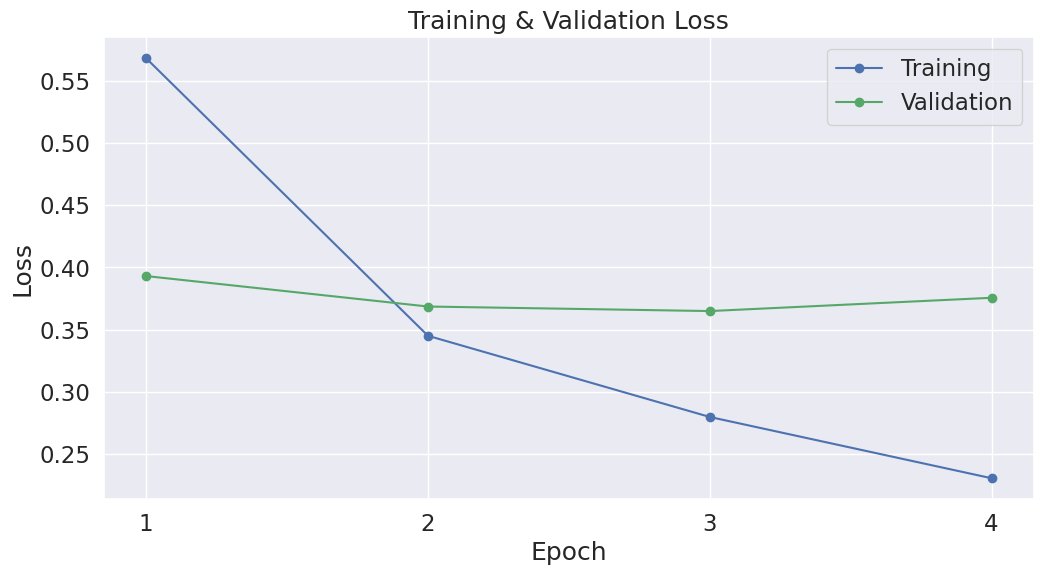

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
# Create sentence and label lists
sentences = test.sentence.values
labels = test.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 17,783 test sentences...
    DONE.


In [ ]:
pred = []
for i in range(len(true_labels)):
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
    pred.extend(pred_labels_i)

pred=np.array(pred)        
print('np.array??',pred)
pred=list(map(int,pred))   
print('np.array??',pred)   

np.array?? [1 1 2 ... 1 1 1]
np.array?? [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
true = []
for i in range(len(true_labels)):
    true.extend(true_labels[i])
    
true=np.array(true) 
print(true)
true=list(map(int,true))   
print(true)  

[1. 1. 1. ... 2. 1. 1.]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
from nltk.metrics import ConfusionMatrix
from sklearn.metrics import classification_report

true = list(true)
pred = list(pred)
cm = ConfusionMatrix(true, pred)
class_rep = classification_report (true, pred)
print(cm)
print(class_rep)

  |     0     1     2 |
--+-------------------+
0 |  <254>  118    58 |
1 |  1249<14325>  616 |
2 |    25    44 <1094>|
--+-------------------+
(row = reference; col = test)

              precision    recall  f1-score   support

           0       0.17      0.59      0.26       430
           1       0.99      0.88      0.93     16190
           2       0.62      0.94      0.75      1163

    accuracy                           0.88     17783
   macro avg       0.59      0.81      0.65     17783
weighted avg       0.94      0.88      0.91     17783



In [ ]:
# lstm.load_state_dict(torch.load(path+'lstm_model.pt'))
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Test Accuracy: " + str(accuracy_score(true, pred)))
print("Test F1 Score: "+ str(f1_score(true, pred, average='micro')))

Test Accuracy: 0.8813473542146995
Test F1 Score: 0.8813473542146995


In [ ]:
bert_result = test.copy()
#bert_result['data_type'] = bert_result['data_type'].values
bert_result['pred'] = pred
bert_result = bert_result.loc[:, ['label', 'pred', 'race']]
aae_group = bert_result.loc[bert_result['race'] == 0]
other_group = bert_result.loc[bert_result['race'] != 0]

In [ ]:
def fpr(cm):
  FP = cm.sum(axis=0) - np.diag(cm)  
  FN = cm.sum(axis=1) - np.diag(cm)
  TP = np.diag(cm)
  TN = cm.sum() - (FP + FN + TP)
  FPR = FP/(FP+TN)
  return FPR

In [ ]:
from sklearn.metrics import confusion_matrix
print("BERT Bias Evaluation: ")
print('\tHate Speech' + ' Offensive' + '  Neither')
aae_cm = confusion_matrix(aae_group['label'], aae_group['pred'])
print("AAE" + '\t' + str(fpr(aae_cm)))
other_cm = confusion_matrix(other_group['label'], other_group['pred'])
print("Non-AAE" + '\t' + str(fpr(other_cm)))

BERT Bias Evaluation: 
	Hate Speech Offensive  Neither
AAE	[0.055247   0.26553672 0.0199355 ]
Non-AAE	[0.09971791 0.05488297 0.07358697]


In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))
